# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

In [3]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import mesa 
import random

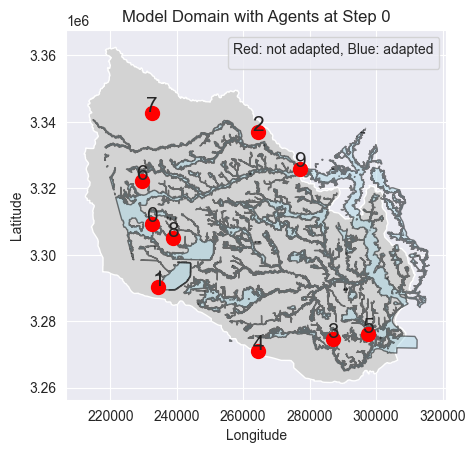

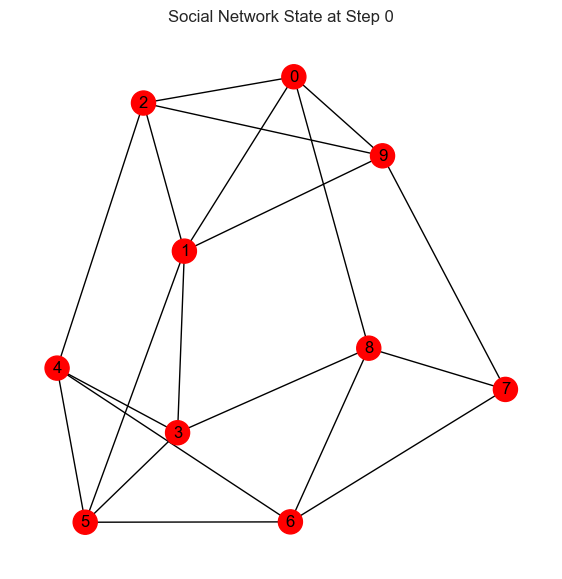

<Figure size 1000x600 with 0 Axes>

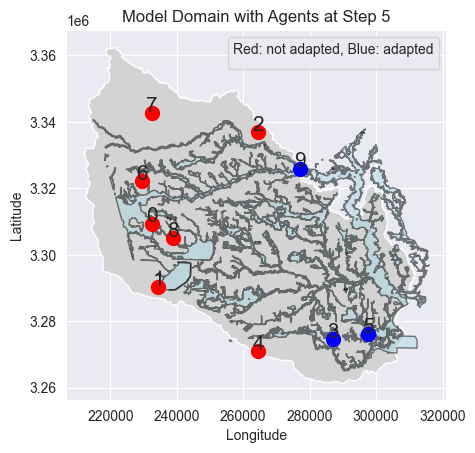

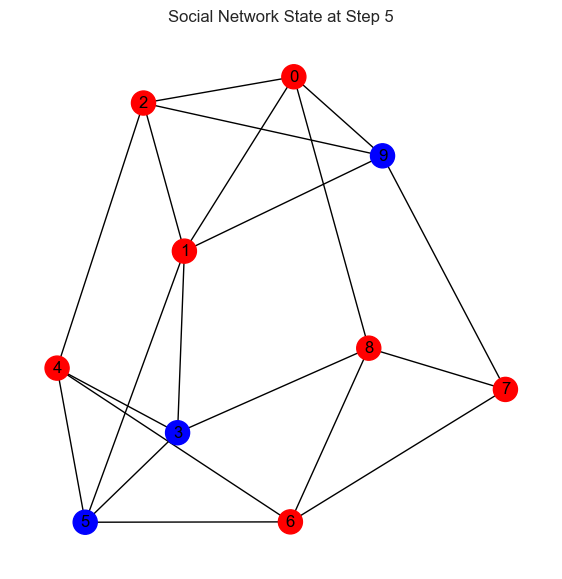

<Figure size 1000x600 with 0 Axes>

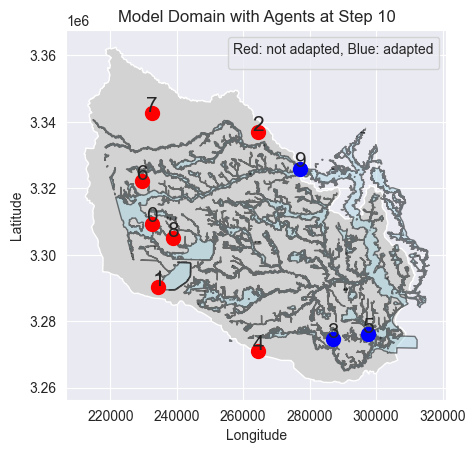

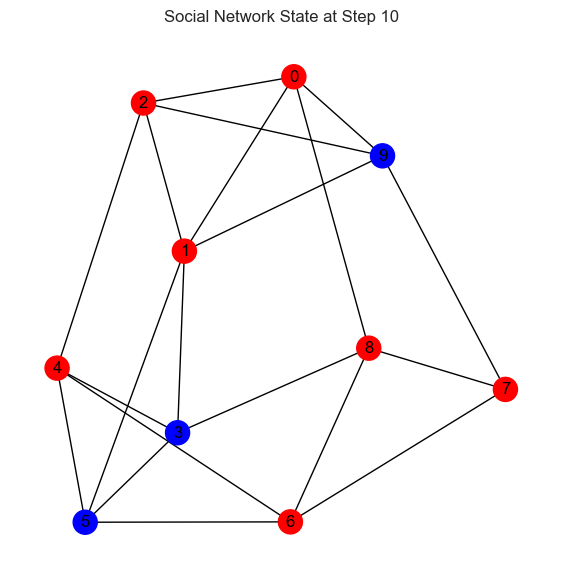

<Figure size 1000x600 with 0 Axes>

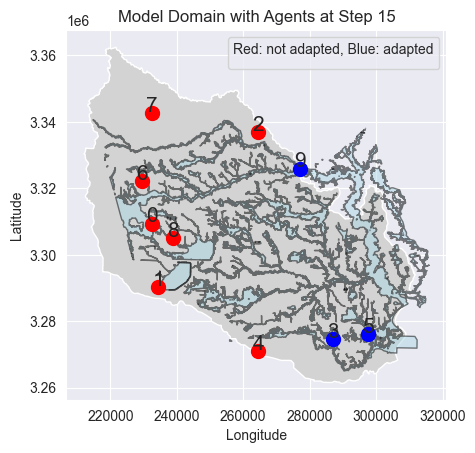

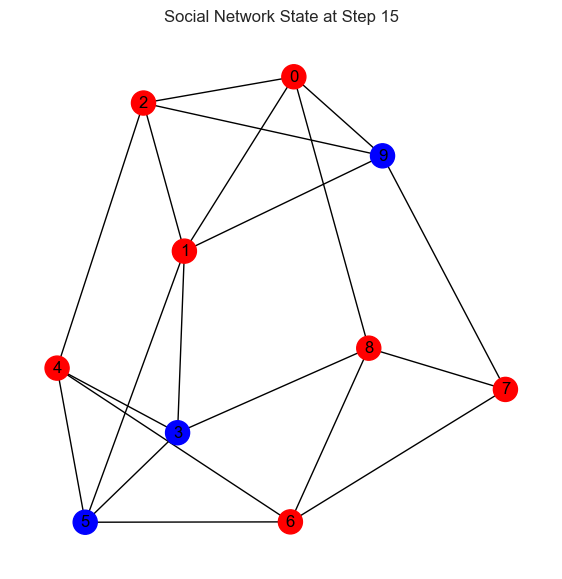

<Figure size 1000x600 with 0 Axes>

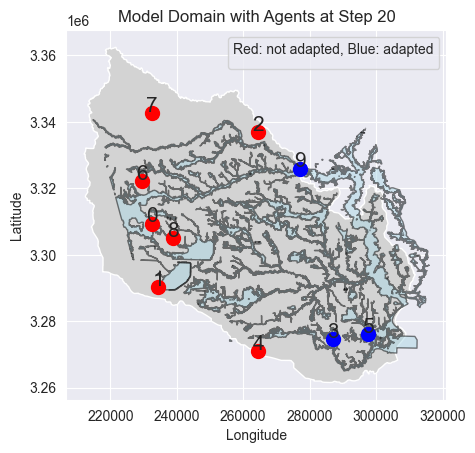

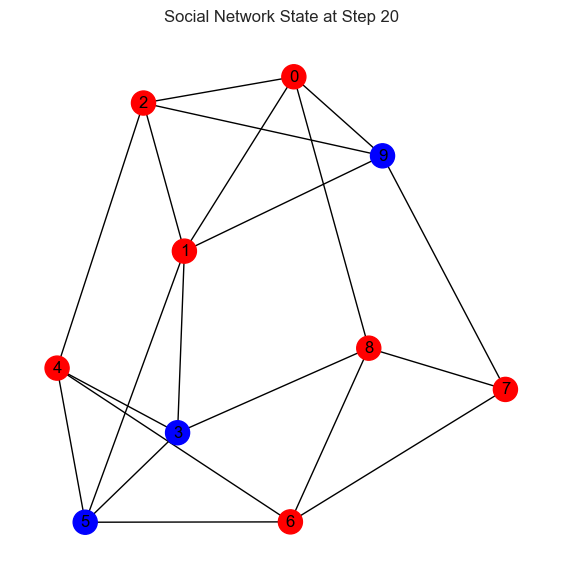

In [4]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=10, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [5]:

warnings.simplefilter("ignore")

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=250, flood_map_choice="100yr", network="watts_strogatz",top_down=True,people_centered=True, seed = None) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Run the model
for i in range(80):
    model.step()    


In [6]:
# Get agent data
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data=agent_data.reset_index().drop(columns=["location","AdaptationStatus","InsuranceType"])
agent_data
agent_data = agent_data.groupby(by="Step").mean()
agent_data.head(5)

,AgentID,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IsAdapted,FriendsCount,FloodAwareness,self_efficacy,house_damage,adaptation_low_effort,adaptation_high_effort,efficacy_binair_true,private_insurance,final_insurance,costs_for_insurance
Step,,,,,,,,,,,,,,,,
0,124.5,1.028457,0.460934,0.0,0.0,0.000,4.0,0.546982,0.568565,NaN,0.000,0.000,0.644,0.000,NaN,0.0
1,124.5,1.028457,0.460934,0.0,0.0,0.500,4.0,0.539625,0.566350,NaN,0.100,0.400,0.648,0.376,100.000000,0.0
2,124.5,1.028457,0.460934,0.0,0.0,0.500,4.0,0.533471,0.564264,NaN,0.100,0.400,0.640,0.376,143.623188,0.0
3,124.5,1.028457,0.460934,0.0,0.0,0.508,4.0,0.527729,0.562220,NaN,0.104,0.404,0.652,0.380,143.623188,0.0
4,124.5,1.028457,0.460934,0.0,0.0,0.508,4.0,0.575693,0.612710,NaN,0.104,0.404,0.676,0.380,143.985507,0.0


In [7]:
# Get model data
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,125
2,125
3,127
4,127
...,...
75,185
76,185
77,185
78,185


## Results

In [8]:
#Batchrunner for all results
from mesa.batchrunner import batch_run

parameters = {'flood_map_choice':['harvey'], 'people_centered':[False, True], 'top_down':[False, True]}

batchrunner = batch_run(AdaptationModel, parameters, iterations=100, max_steps=80,number_processes=None, data_collection_period = 4)


  0%|          | 0/400 [00:00<?, ?it/s]

In [9]:
# Save results in pandas dataframe
import pandas as pd
results_df = pd.DataFrame(batchrunner)

In [10]:
# group by the communication strategies, to get an overview of the communication strategies and the KPI's
df_results_final = results_df.groupby(['people_centered', 'top_down'], axis=0).agg({'FloodDepthEstimated':'mean', 'FloodDamageEstimated':'mean', 'FloodDepthActual':'mean', 'FloodDamageActual':'mean',
                                                                                            'FloodAwareness':'mean', 'adaptation_low_effort':'mean', 'adaptation_high_effort':'mean', 'efficacy_binair_true':'mean', 
                                                                                            'private_insurance': 'mean', 'self_efficacy':'mean'}).reset_index()

In [11]:
df_results_final

,people_centered,top_down,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,FloodAwareness,adaptation_low_effort,adaptation_high_effort,efficacy_binair_true,private_insurance,self_efficacy
0,False,False,1.063571,0.471155,0.080453,0.102806,0.340629,0.060842,0.299156,0.249762,0.266731,0.433719
1,False,True,1.056917,0.470215,-0.123953,0.050844,0.482783,0.099259,0.484743,0.751404,0.428385,0.590531
2,True,False,1.059006,0.469666,-0.114629,0.051798,0.668208,0.081025,0.508777,0.642400,0.485912,0.670460
3,True,True,1.052257,0.468643,-0.176643,0.037138,0.782438,0.107069,0.557813,0.868768,0.506526,0.751269


In [12]:
import seaborn as sns

In [15]:
palette = ["red","blue","black", "purple"]

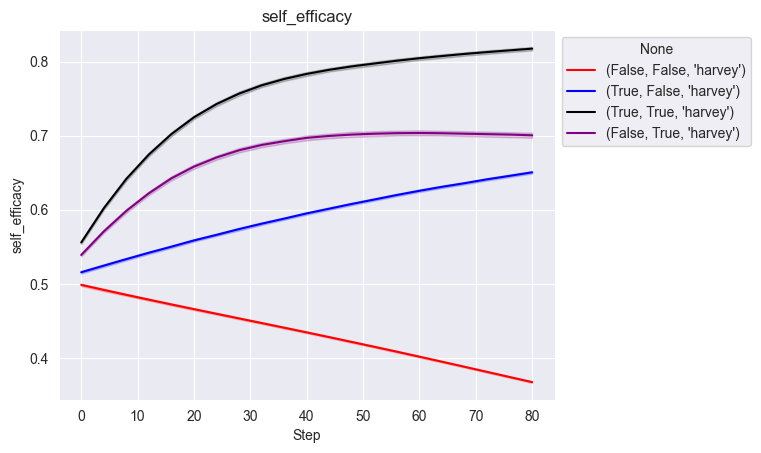

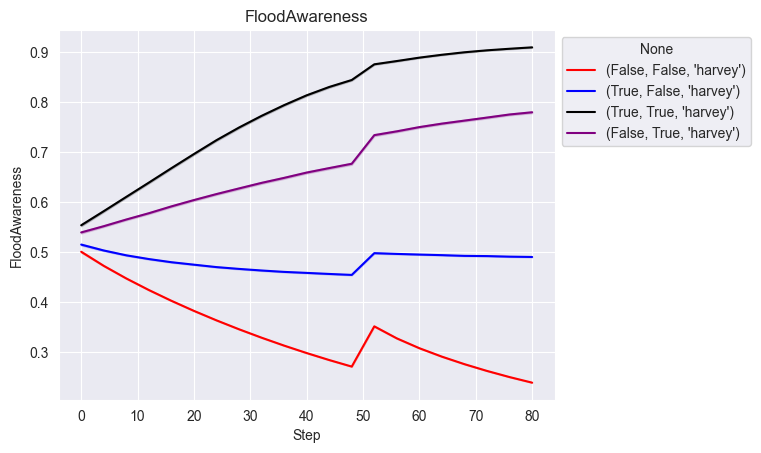

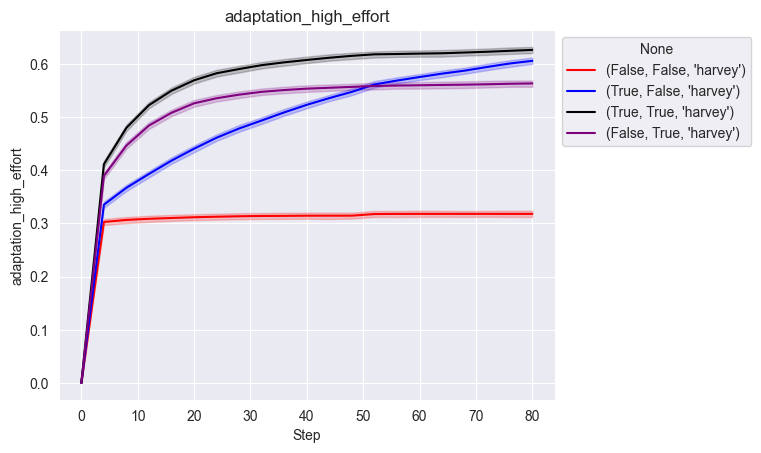

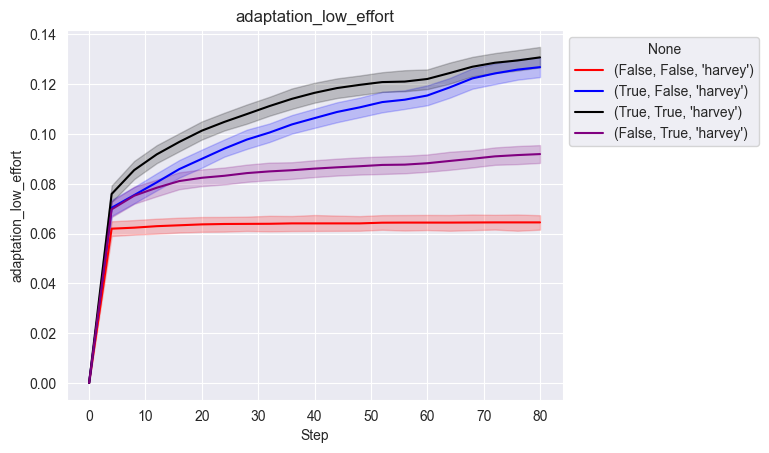

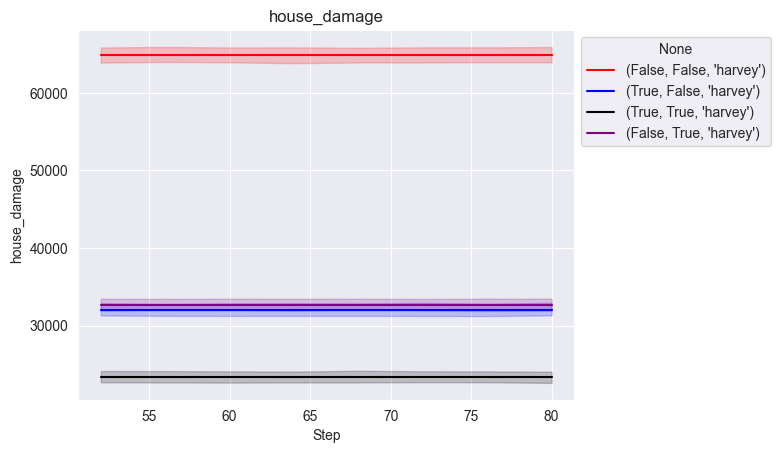

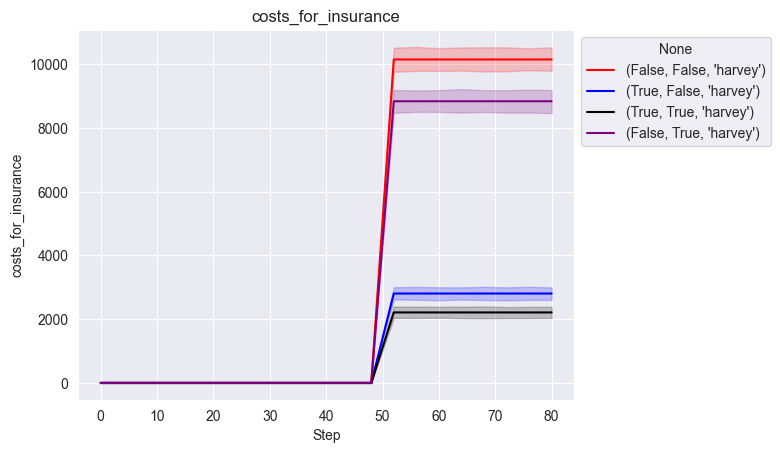

In [16]:
# Plot results for KPI's
for index, variable in enumerate(["self_efficacy","FloodAwareness","adaptation_high_effort","adaptation_low_effort", 'house_damage', 'costs_for_insurance' ]):

    ax = sns.lineplot(data=results_df,x="Step",y=variable,hue=results_df[['top_down', 'people_centered','flood_map_choice']].apply(tuple, axis=1),palette=palette)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(variable)
    plt.show()



## Scenarios

In [17]:
# Batchrunner for all scenarios 
from mesa.batchrunner import batch_run

parameters_scenarios = {'flood_map_choice':['100yr', '500yr','harvey'], 'people_centered':[False], 'top_down':[False]}

batchrunner_scenario = batch_run(AdaptationModel, parameters_scenarios, iterations=100, max_steps=80,number_processes=None, data_collection_period = 4)


  0%|          | 0/300 [00:00<?, ?it/s]

In [18]:
# Save results in a dataframe
results_scenarios = pd.DataFrame(batchrunner_scenario)

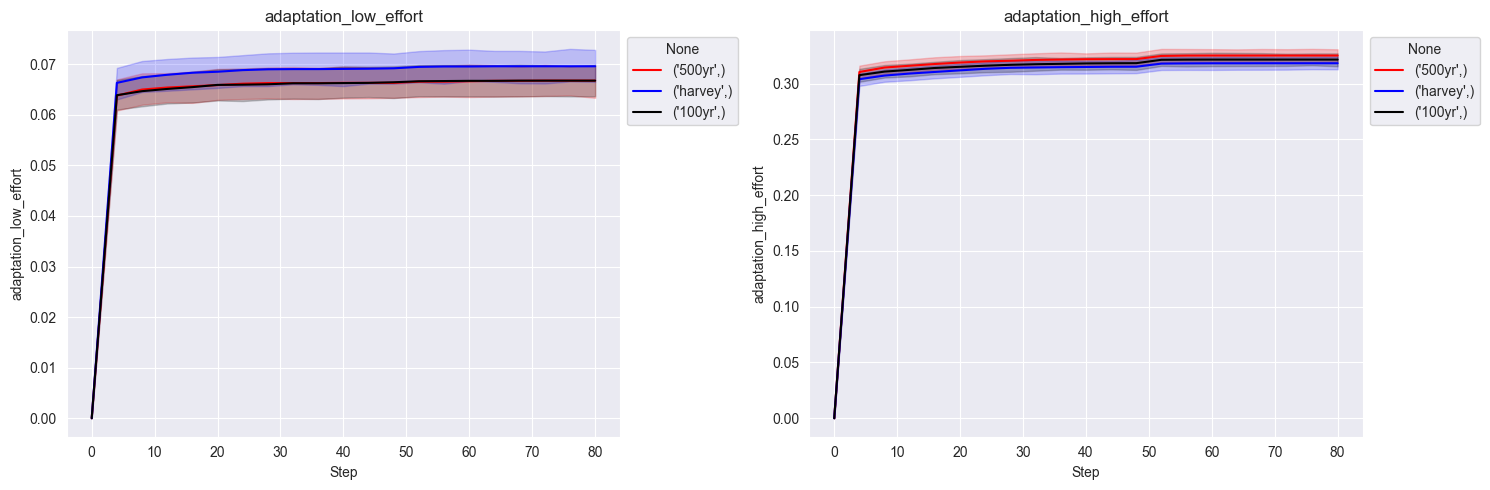

In [19]:
# Plot the adaptation of measures by different scenarios
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax=ax.flatten()
for index, variable in enumerate(["adaptation_low_effort", "adaptation_high_effort"]):

    sns.lineplot(data=results_scenarios,x="Step",y=variable,hue=results_scenarios[['flood_map_choice']].apply(tuple, axis=1),ax=ax[index],palette=palette)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))

    ax[index].set_title(variable)
fig.tight_layout()
plt.show()

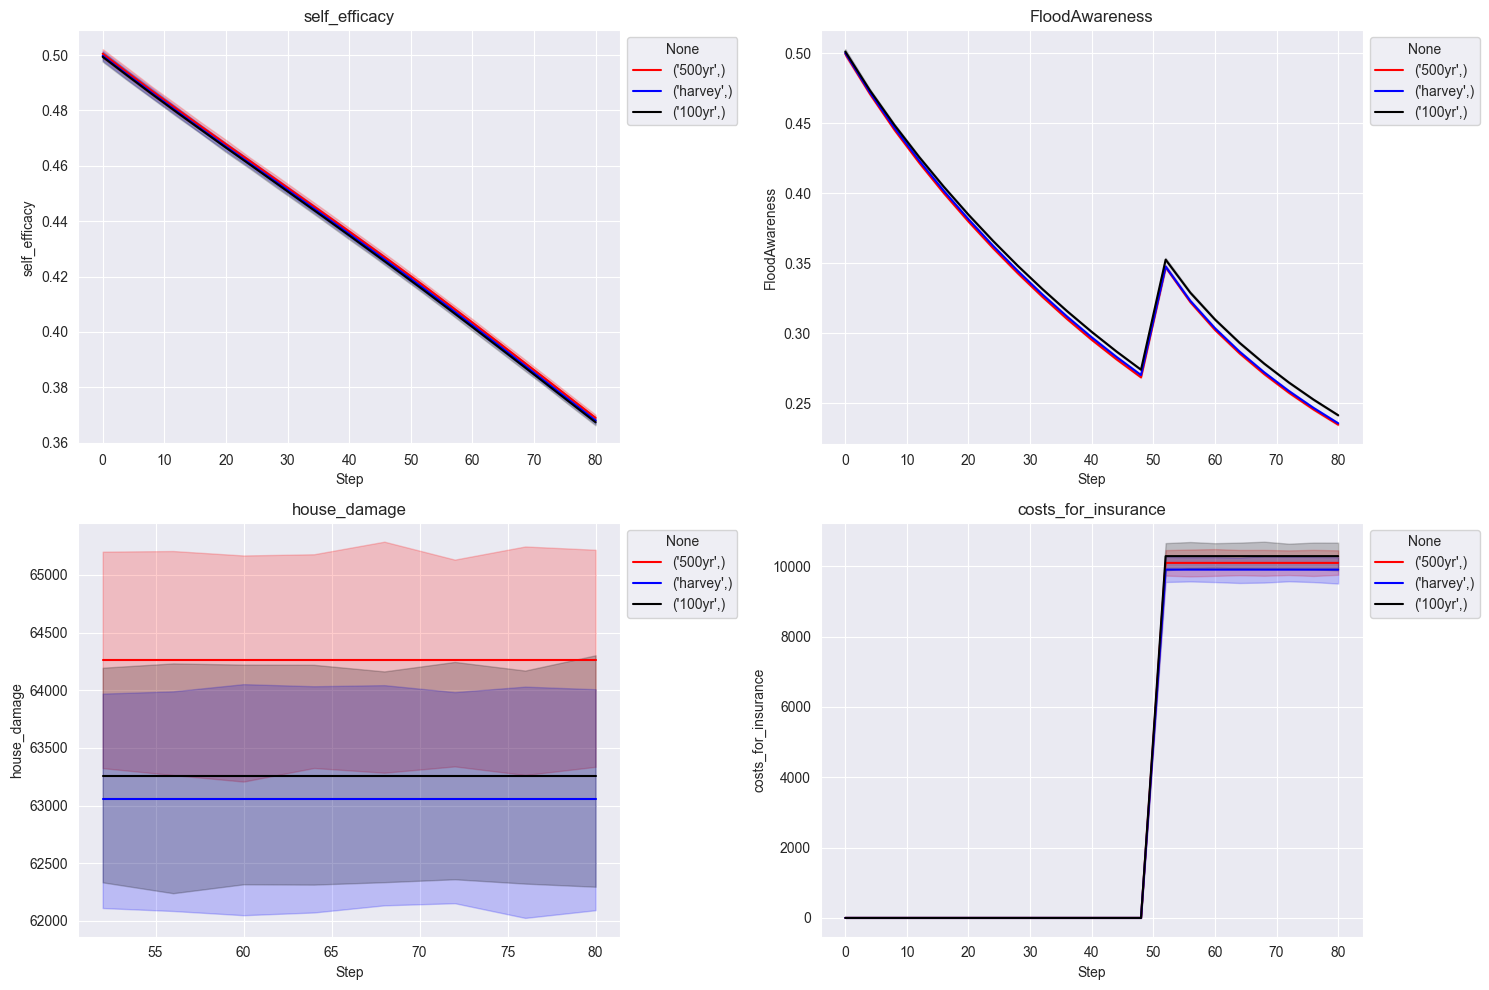

In [20]:
# Plot the rest of the KPI's during different scenarios
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax=ax.flatten()
for index, variable in enumerate(["self_efficacy","FloodAwareness", 'house_damage', 'costs_for_insurance']):

    sns.lineplot(data=results_scenarios,x="Step",y=variable,hue=results_scenarios[['flood_map_choice']].apply(tuple, axis=1),ax=ax[index],palette=palette)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))

    ax[index].set_title(variable)
fig.tight_layout()
plt.show()

## Sensitivity analysis

In [21]:
# Sensitivity Analysis
import pandas as pd
from mesa.batchrunner import batch_run

# Define the names of the variables we want to change
variabless = ['flood_aware_increase_td', 'self_efficacy_increase_td', 'high_risk_hh_threshold' , 'flood_aware_increase_pc', 'self_efficacy_increase_pc']

# Define different values for the variables
parameters_flood_aware_increase_td = {'flood_map_choice':['500yr'], 'people_centered':False, 'top_down':True, 'flood_aware_increase_td':[0.08, 0.1, 0.12]}
parameters_self_efficacy_increase_td = {'flood_map_choice':['500yr'], 'people_centered':False, 'top_down':True, 'self_efficacy_increase_td':[0.08, 0.1, 0.12]}
parameters_high_risk_hh_threshold = {'flood_map_choice':['500yr'], 'people_centered':True, 'top_down':False, 'high_risk_hh_threshold':[40,50,60]}
parameters_flood_aware_increase_pc = {'flood_map_choice':['500yr'], 'people_centered':True, 'top_down':False, 'flood_aware_increase_pc':[0.16, 0.2, 0.24]}
parameters_self_efficacy_increase_pc = {'flood_map_choice':['500yr'], 'people_centered':True, 'top_down':False, 'self_efficacy_increase_pc':[0.16, 0.2, 0.24]}

# Make a list which refers to the dictionaries of the variables and their values
parameterss = [parameters_flood_aware_increase_td, parameters_self_efficacy_increase_td, parameters_high_risk_hh_threshold, parameters_flood_aware_increase_pc, parameters_self_efficacy_increase_pc]

def sensitivity_analysis(parameter_list, variable_list, cnt):
    # We want to do a sensitivity analysis for all variables in the parameter_list
    for variable in parameter_list:
        global df_resultss

        # Run the batchrunner for the variable
        batchrunner_variable = batch_run(AdaptationModel, variable, iterations=100, max_steps=80, number_processes=None)
        # Save the outcomes of the batchrunner in a dataframe
        df_sensitivity = pd.DataFrame(batchrunner_variable)

        # Look at all the keys in the dictionary of a variable (of parameter_list) to find the variable that is changed
        for key,value in variable.items():
            for item in variable_list:
                # If the key matches with the variable name of variable_list, we can take this string for the rest of the analysis, called sensitivity_variable
                if key == item:
                    cnt+=1
                    sensitivity_variable = item
                    
                    # To make it clear which experiment is done, create an extra column and refer to the value of the variable of this run
                    df_sensitivity[sensitivity_variable] = df_sensitivity[sensitivity_variable].astype('string')
                    df_sensitivity['experiment'] = str(sensitivity_variable) + " " + df_sensitivity[sensitivity_variable]

                    # Drop the "old" column which referred to the variable, since this column does not make sense when also adding the other variables
                    df_sensitivity = df_sensitivity.drop(sensitivity_variable, axis=1)

                    # When it is the first step, there is no dataset yet, and the final dataset is the dataset just created
                    if cnt == 1:
                        df_resultss = df_sensitivity
                    
                    # When there is already a dataset, the existing dataset should be joined to the new dataset with the new variable
                    else:
                        df_resultss = pd.concat([ df_resultss, df_sensitivity])
                        
                        
                    # When the values for every variable are calculated, the final dataset can be returned
                    if cnt==5:
                        return df_resultss
                        

    # DIT KAN WEG DENK?
    return df_resultss

In [22]:
sensitivity_analysis(parameterss, variabless, 0)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

,RunId,iteration,Step,flood_map_choice,people_centered,top_down,total_adapted_households,AgentID,FloodDepthEstimated,FloodDamageEstimated,...,FloodAwareness,self_efficacy,house_damage,adaptation_low_effort,adaptation_high_effort,efficacy_binair_true,private_insurance,final_insurance,costs_for_insurance,experiment
0,3,1,80,500yr,False,True,175,0,8.355359,1.000000,...,0.429260,0.680043,212947.769796,False,True,True,True,150.0,0.0,flood_aware_increase_td 0.08
1,3,1,80,500yr,False,True,175,1,0.196875,0.364542,...,0.517908,0.932890,0.000000,True,False,True,False,NaN,0.0,flood_aware_increase_td 0.08
2,3,1,80,500yr,False,True,175,2,0.239194,0.398538,...,0.420993,0.663721,0.000000,True,False,True,False,NaN,0.0,flood_aware_increase_td 0.08
3,3,1,80,500yr,False,True,175,3,0.414848,0.494680,...,0.556375,0.826404,0.000000,False,True,True,False,NaN,0.0,flood_aware_increase_td 0.08
4,3,1,80,500yr,False,True,175,4,0.895073,0.628946,...,0.432163,0.522476,0.000000,False,True,True,True,150.0,0.0,flood_aware_increase_td 0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,299,99,80,500yr,True,False,164,245,2.981380,0.839031,...,0.985356,1.000000,151607.688679,False,True,True,True,150.0,0.0,self_efficacy_increase_pc 0.24
74996,299,99,80,500yr,True,False,164,246,0.512157,0.531471,...,0.691117,0.567588,0.000000,False,True,True,True,150.0,0.0,self_efficacy_increase_pc 0.24
74997,299,99,80,500yr,True,False,164,247,0.000000,0.000000,...,0.742060,0.491375,0.000000,False,False,False,False,NaN,0.0,self_efficacy_increase_pc 0.24
74998,299,99,80,500yr,True,False,164,248,0.210886,0.376546,...,0.657535,0.482484,0.000000,True,False,False,False,NaN,0.0,self_efficacy_increase_pc 0.24


In [23]:
# Save the columns for the KPI in a new dataframe
kpi_columns = df_resultss[['RunId', 'iteration', 'Step', 'house_damage' ,  'FloodAwareness','IsAdapted', 'experiment', 'self_efficacy']]

In [24]:
# Add new columns were it becomes clear which experiment has run

experimentVariable =[[s for s in text.split()][0] for text in kpi_columns["experiment"]]#if s.isdigit() string.replace(".", "").isnumeric()
experimentvalue  =[[s for s in text.split()][1] for text in kpi_columns["experiment"]]

kpi_columns["ExperimentVariable"]=experimentVariable
kpi_columns["ExperimentValue"]=experimentvalue
dict_converter ={"0.08": "-20%", "0.1": "0%","0.12": "20%","40": "-20%","50": "0%","60": "20%","0.16": "-20%","0.2": "0%","0.24": "20%" }
for key in dict_converter.keys():
    kpi_columns["ExperimentValue"]=kpi_columns["ExperimentValue"].replace(key, dict_converter[key])

    
kpi_columns

,RunId,iteration,Step,house_damage,FloodAwareness,IsAdapted,experiment,self_efficacy,ExperimentVariable,ExperimentValue
0,3,1,80,212947.769796,0.429260,True,flood_aware_increase_td 0.08,0.680043,flood_aware_increase_td,-20%
1,3,1,80,0.000000,0.517908,True,flood_aware_increase_td 0.08,0.932890,flood_aware_increase_td,-20%
2,3,1,80,0.000000,0.420993,True,flood_aware_increase_td 0.08,0.663721,flood_aware_increase_td,-20%
3,3,1,80,0.000000,0.556375,True,flood_aware_increase_td 0.08,0.826404,flood_aware_increase_td,-20%
4,3,1,80,0.000000,0.432163,True,flood_aware_increase_td 0.08,0.522476,flood_aware_increase_td,-20%
...,...,...,...,...,...,...,...,...,...,...
74995,299,99,80,151607.688679,0.985356,True,self_efficacy_increase_pc 0.24,1.000000,self_efficacy_increase_pc,20%
74996,299,99,80,0.000000,0.691117,True,self_efficacy_increase_pc 0.24,0.567588,self_efficacy_increase_pc,20%
74997,299,99,80,0.000000,0.742060,False,self_efficacy_increase_pc 0.24,0.491375,self_efficacy_increase_pc,20%
74998,299,99,80,0.000000,0.657535,True,self_efficacy_increase_pc 0.24,0.482484,self_efficacy_increase_pc,20%


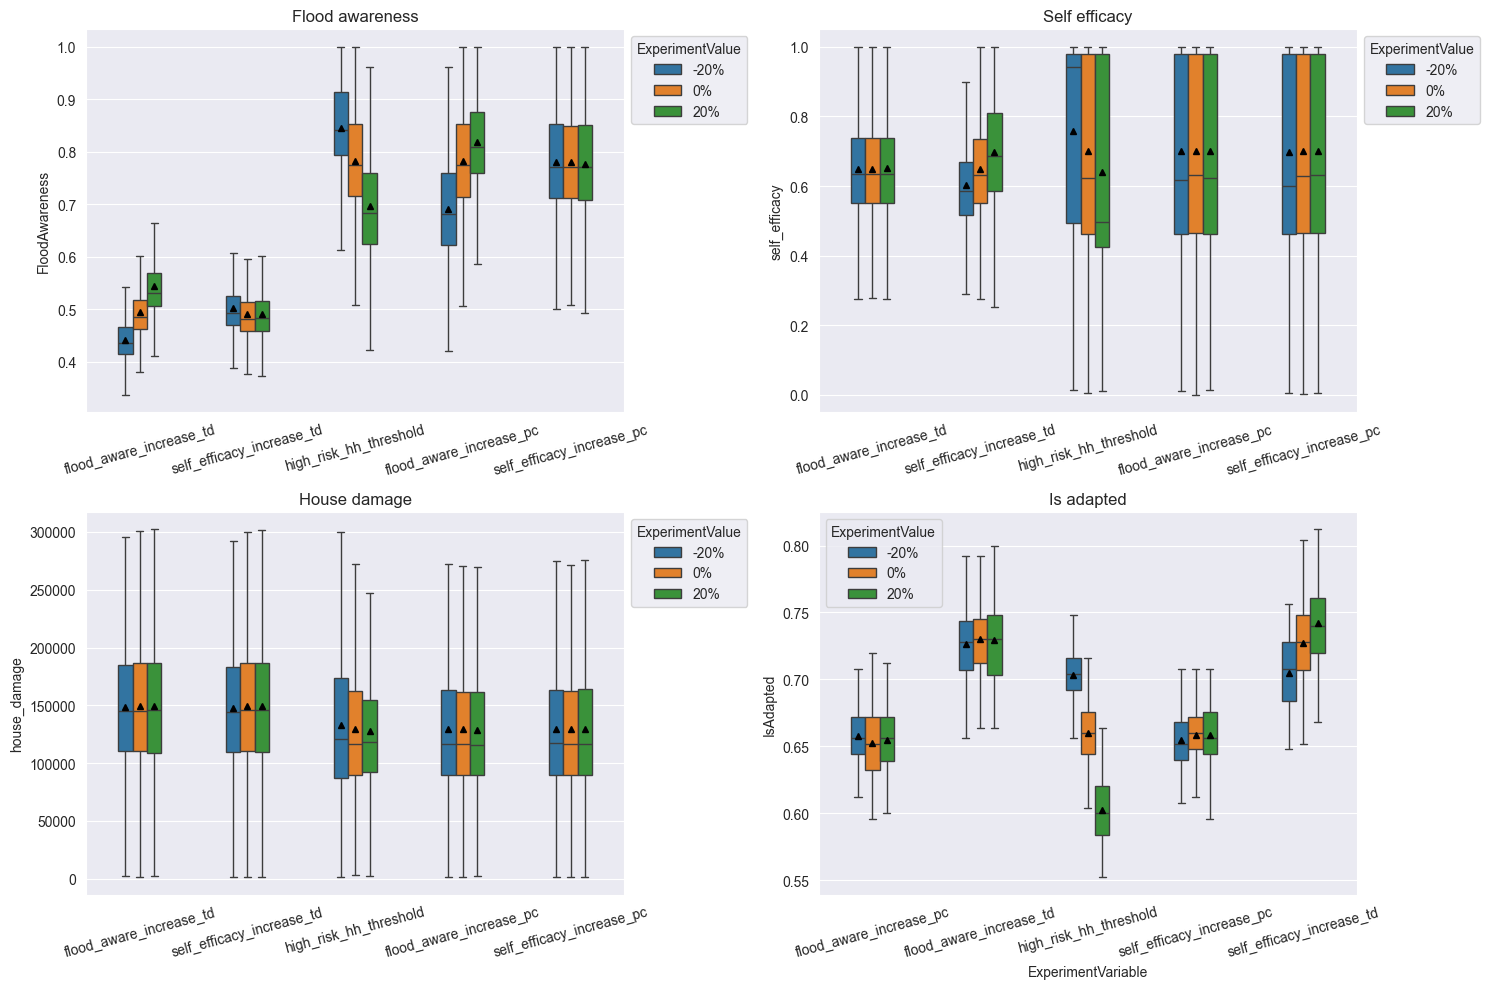

In [25]:
# Create plots for different KPI's
import seaborn as sns
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.flatten()
for index,kpi in enumerate(['FloodAwareness','self_efficacy']):
    hue_order = ['-20%', '0%', '20%']
    sns.boxplot(ax=ax[index],data = kpi_columns, x='ExperimentVariable', y = kpi,hue=kpi_columns['ExperimentValue'],hue_order=hue_order, showfliers = False, width=0.4,showmeans=True,meanprops={
                        "markeredgecolor": "black",
                        "markerfacecolor": "black",
                        "markersize": "5"})
    ax[index].tick_params(axis='x', rotation=15)
    sns.move_legend(ax[index],"upper left", bbox_to_anchor=(1, 1))


# For house damage, there are various houses which do not have damage. To see a clear effect of the damage, 
    # it has been decided to delete the rows who did not have an insurance. Otherwise, the averages would be too low.
kpi_columns_damage=kpi_columns[kpi_columns['house_damage'] != 0]
for index,kpi in enumerate(['house_damage']):
    hue_order = ['-20%', '0%', '20%']
    sns.boxplot(ax=ax[index+2],data = kpi_columns_damage, x='ExperimentVariable', y = kpi,hue=kpi_columns_damage['ExperimentValue'],hue_order=hue_order, showfliers = False, width=0.4,showmeans=True,meanprops={
                        "markeredgecolor": "black",
                        "markerfacecolor": "black",
                        "markersize": "5"})
    ax[index+2].tick_params(axis='x', rotation=15)
    sns.move_legend(ax[index+2],"upper left", bbox_to_anchor=(1, 1))

# For the number of adapted agents, the mean should be taken for each step. Otherwise, the plots show the overall mean, and the boxplot covers all values from 0 to 1
groep_adapted = kpi_columns.groupby(['RunId', 'ExperimentVariable']).agg({'IsAdapted':'mean', 'ExperimentValue': lambda x: x.mode().iat[0], 'experiment': lambda x: x.mode().iat[0] })
for index,kpi in enumerate(['IsAdapted']):
    hue_order = ['-20%', '0%', '20%']
    sns.boxplot(ax=ax[index+3],data = groep_adapted, x='ExperimentVariable', y = kpi,hue=groep_adapted['ExperimentValue'],hue_order=hue_order, showfliers = False, width=0.4,showmeans=True,meanprops={
                        "markeredgecolor": "black",
                        "markerfacecolor": "black",
                        "markersize": "5"})
    ax[index+3].tick_params(axis='x', rotation=15)
    sns.move_legend(ax[index+2],"upper left", bbox_to_anchor=(1, 1))


ax[0].set_title('Flood awareness')
ax[1].set_title('Self efficacy')
ax[2].set_title('House damage')
ax[3].set_title('Is adapted')

for i in range(3):
    ax[i].set_xlabel('')
    
fig.tight_layout()
plt.show()

In [26]:
kpi_columns.head(5)


,RunId,iteration,Step,house_damage,FloodAwareness,IsAdapted,experiment,self_efficacy,ExperimentVariable,ExperimentValue
0,3,1,80,212947.769796,0.429260,True,flood_aware_increase_td 0.08,0.680043,flood_aware_increase_td,-20%
1,3,1,80,0.000000,0.517908,True,flood_aware_increase_td 0.08,0.932890,flood_aware_increase_td,-20%
2,3,1,80,0.000000,0.420993,True,flood_aware_increase_td 0.08,0.663721,flood_aware_increase_td,-20%
3,3,1,80,0.000000,0.556375,True,flood_aware_increase_td 0.08,0.826404,flood_aware_increase_td,-20%
4,3,1,80,0.000000,0.432163,True,flood_aware_increase_td 0.08,0.522476,flood_aware_increase_td,-20%


In [27]:
# To get an overview of all the values for each experiment, the results are grouped by experiment
resultskpi = kpi_columns.groupby('experiment').agg({'FloodAwareness':'mean', 'adaptation_low_effort':'mean',
                                                                                'adaptation_high_effort':'mean',
                                                                                'self_efficacy':'mean'}).reset_index()

# However, for house damage, we deleted some rows. Therefore, a new dataset is made to get the values for these groups. 
resultsdamage = kpi_columns_damage.groupby('experiment').agg({'house_damage':'mean', 'costs_for_insurance':'mean'}).reset_index()

KeyError: "Column(s) ['adaptation_high_effort', 'adaptation_low_effort'] do not exist"